# INDICE:

1. ¿Qué datos tenemos?
1. Perfil de declarantes en España.
1. Perfil de declarantes por CCAA.
1. ¿Cuanto Ingresó España en concepto de IRPF?
1. ¿Cuanto Ingresaron las CCAA en concepto de IRPF?
    1. ¿Que CCAA ingresa más?
    1. ¿Qué CCAA ingresa menos?
1. ¿Qué CCAA prefieren las rentas altas?
    1. ¿Competencia fiscal?
1. ¿Es el IRPF progresivo?
    1. En España
    1. CCAA
    1. Tramos de renta
    1. Rentas altas
1. ¿Indice de Progresividad Global?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
from pandas import Series, DataFrame

In [3]:
sns.set_style('whitegrid')
# sns.set(style="ticks", palette="Set2")
sns.despine()

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 150)

In [5]:
%matplotlib inline

In [6]:
!open .

|![metodología muestreo 1][img1]|![metodología muestreo 1][img2]|
|---|---|
|![metodología muestreo 1][img3]|||

[img1]: imgs/img1.jpg
[img2]: imgs/img2.jpg
[img3]: imgs/img3.jpg

# DATOS:

In [7]:
INFO = pd.read_csv('data/variables_descripcion.csv', encoding='utf-8', index_col=0)

In [8]:
INFO.head()

,descripcion
variables,
c17,RENDIMIENTOS DEL TRABAJO: REDUCCIÓN CON CARÁCTER GENERAL
c455,BASE IMPONIBLE GENERAL (450 ­ 451 + 452 ­ 453 ­ 454)
c620,BASE LIQUIDABLE GENERAL SOMETIDA A GRAVAMEN. (618 ­ 619)
c679,MÍNIMO PERSONAL Y FAMILIAR (675 + 676 + 677 + 678)
c689,APLICACIÓN DE LAS ESCALAS DEL IMPUESTO AL IMPORTE DE LA CASILLA 620 (Parte Estatal).


In [9]:
data_init = pd.read_csv('data/data_2010.csv') # importamos el dataframe filtrado

In [10]:
var_monetarias = list(data_init.columns[:13]) + ['ingresostrabajo']

# INFORMACIÓN

In [11]:
trans_ccaa = pd.read_csv('data/nombres_ccaa.csv').to_dict(orient='record')[0]

In [12]:
trans_tramo = {1 : 'Negativas y cero',
               2 : 'De 0,01 a 3.000,00',
               3 : 'De 3.000,01 a 6.000,00',
               4 : 'De 6.000,01 a 12.000,00',
               5 : 'De 12.000,01 a 18.000,00',
               6 : 'De 18.000,01 a 30.000,00',
               7 : 'De 30.000,01 a 60.000,00',
               8 : 'De 60.000,01 a 120.000,00',
               9 : 'De 120.000,01 a 240.000,00',
               10 : 'De 240.000,01 en adelante'}

trans_minimosdecla = {1: 'Mínimo personal correspondiente a declaración individual y mínimo por descendientes=0',
                      2: 'Mínimo personal correspondiente a declaración individual y mínimo por descendientes>0',
                      3: 'Mínimo personal correspondiente a declaración conjunta monoparental y mínimo por descendientes>0',
                      4: 'Mínimo personal correspondiente a declaración conjunta',
                      9: 'Casos no identificados'}
trans_categoriadecla = {1: u'Individuos no casados[tipotributacion=I, ncyge=0]', 
                        2: u'Familias monoparentales [tipotributacion=C, ncyge=0]',
                        3: u'Matrimonios que presentan declaración conjunta[tipotributacion=C,ncyge>0]',
                        4: u'Matrimonios que presentan declaraciones separadas[tipotributacion=I, ncyge>0]'}

In [13]:
data_init.head()

,c17,c455,c620,c679,c689,c690,c698,c699,c720,c721,c730,c731,c732,categoriadecla,ccaa,factoroptimizado,fechappal,ingresostrabajo,marcafuente,minimosdecla,sexoppal,tipotributacion,tramo
0,0,7017232,7017232,1101600,1164536,1147107,1032785,1019763,617087,604066,617087,604066,1221153,4,12,10.224510,19600124,0,0,2,1,I,8
1,0,21948858,20498858,606900,4063085,4063085,4086601,4086601,4065923,4065923,4065923,4065923,8131846,4,1,1.054162,19520412,0,0,2,1,I,9
2,265200,1421115,1081115,515100,129733,129733,72871,72871,72871,72871,72871,72871,145742,3,13,49.700609,19540408,1915000,1,4,1,C,5
3,0,1843496,1628496,698700,195419,195419,114657,114657,47044,47044,47044,47044,94088,2,8,15.634339,19650716,0,0,3,2,C,6
4,321654,898966,558966,923100,67075,64840,8405,8405,8405,8405,8405,8405,16810,3,12,53.170935,19330422,1164702,1,4,1,C,5


# DATOS POBLACIONALES

In [14]:
data_pob = data_init.copy() # variables no monetarias incluimos sin cambios
data_pob.head()

,c17,c455,c620,c679,c689,c690,c698,c699,c720,c721,c730,c731,c732,categoriadecla,ccaa,factoroptimizado,fechappal,ingresostrabajo,marcafuente,minimosdecla,sexoppal,tipotributacion,tramo
0,0,7017232,7017232,1101600,1164536,1147107,1032785,1019763,617087,604066,617087,604066,1221153,4,12,10.224510,19600124,0,0,2,1,I,8
1,0,21948858,20498858,606900,4063085,4063085,4086601,4086601,4065923,4065923,4065923,4065923,8131846,4,1,1.054162,19520412,0,0,2,1,I,9
2,265200,1421115,1081115,515100,129733,129733,72871,72871,72871,72871,72871,72871,145742,3,13,49.700609,19540408,1915000,1,4,1,C,5
3,0,1843496,1628496,698700,195419,195419,114657,114657,47044,47044,47044,47044,94088,2,8,15.634339,19650716,0,0,3,2,C,6
4,321654,898966,558966,923100,67075,64840,8405,8405,8405,8405,8405,8405,16810,3,12,53.170935,19330422,1164702,1,4,1,C,5


In [15]:
for vm in var_monetarias:
    data_pob[vm] = data_init[vm] * (data_init.factoroptimizado) / 100 # en EUROS

In [16]:
# data_pob.describe().T
'{:,}'.format(data_pob.c455.sum()).replace(',', ' ')

'368 961 843 410.7459'

In [17]:
data_pob.c455.describe()

count      582154.000000
mean       633787.354224
std        575630.719130
min      -7703238.116708
25%        160223.026147
50%        564948.263527
75%       1041604.599949
max      51809254.012600
Name: c455, dtype: float64

In [18]:
data_pob['ccaa'] = data_pob.ccaa.map(str)
data_pob['ccaa'] = data_pob.ccaa.map(trans_ccaa) # traducir codigo numérico por los nombres de las CCAA
data_pob['ccaa'] = data_pob.ccaa.astype('category')

In [19]:
data_pob.ccaa.head()

0    Comunidad de Madrid
1              Andalucía
2       Región de Murcia
3        Castilla y León
4    Comunidad de Madrid
Name: ccaa, dtype: category
Categories (17, object): [Andalucía, Aragón, Canarias, Cantabria, ..., La Rioja, Melilla, Principado de Asturias, Región de Murcia]

In [20]:
# del data_init

# COMPROBACIÓN

In [21]:
# resultados poblacionales, para comprobar:

res_pob = dict(zip(['c680', 'c620','c630','c698','c699','c720','c721'],
                   [108734157.,345275629.,38755454.,37955079.,37770803.,35550225.,35081330.]))

In [22]:
# comprobación de las variables poblacionales:
i = 0

In [23]:
variables = ['c680','c620','c630','c698','c699','c720','c721']
var = variables[-1]  # variable a comprobar.
i += 1

In [24]:
INFO.loc[var]

descripcion    CUOTA LIQUIDA AUTONOMICA ( 699 - 701 - 703 - 705 - 707 - 709 - 711 - 713 - 715 - 717 )
Name: c721, dtype: object

In [25]:
#PROBLEMA

print('\nEstimación:')
print('{} \t= \t{:,}'.format(var, data_pob[var].sum()).replace(',', ' '))

print('\nReal:')
print('{} \t= \t{:,}'.format(var, res_pob[var] * 1000).replace(',', ' '))

print('\nDiferencia:')
print('Diff \t= \t{:,.2f}'.format(data_pob[var].sum()-res_pob[var] * 1000).replace(',', ' '))


Estimación:
c721 	= 	35 119 246 184.29857

Real:
c721 	= 	35 081 330 000.0

Diferencia:
Diff 	= 	37 916 184.30


In [26]:
# footnote para los graficos:
foot = u'FUENTE: Instituto de Estudios Fiscales, Datos panel IRPF 2010, IES.es\nElaboración propia: Maximiliano Greco, @mmngreco' 

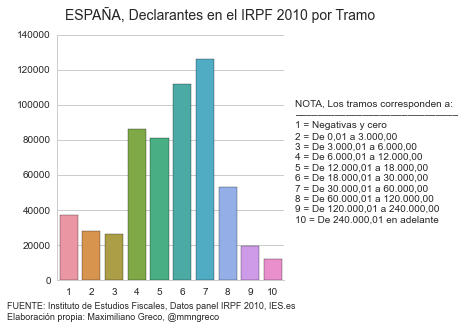

In [27]:
nota = u'''NOTA, Los tramos corresponden a:\n–––––––––––––––––––––––––––––'''

for k, v in trans_tramo.items():
    nota += '\n%s = %s' % (k,v)

plt.figure(figsize=(10,10))

fg = sns.factorplot('tramo', 
                    data=data_pob, 
                    kind='count', 
                    order=range(1,11))

fg.set_axis_labels('','')

# tittle
ttl= u'ESPAÑA, Declarantes en el IRPF 2010 por Tramo'
plt.gcf().text(0.2, 1, "%s" % ttl, fontsize=14, transform=(1,1))

# footnote
plt.gcf().text(0, -0.04, "%s" % foot, fontsize=9, transform=(1,1))

# nota
plt.gcf().text(1, 0.3, nota,)
plt.tight_layout()
plt.savefig(u'imgs/dist_declarantes_por_tramos_españa.png', bbox_inches='tight', dpi=100)


# TABLA DE FRECUENCIAS

In [28]:
# crear tabla con frecuencias:
tabla_frecuencia = data_pob[['tramo', 'ccaa']].copy()

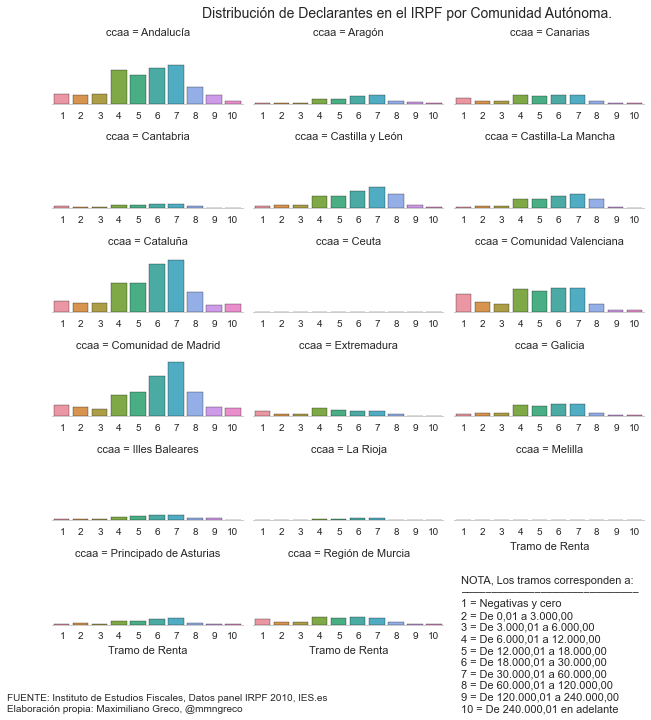

In [29]:
# text

ttl = u'Distribución de Declarantes en el IRPF por Comunidad Autónoma.'

nota = u'''NOTA, Los tramos corresponden a:\n–––––––––––––––––––––––––––––'''
for k, v in trans_tramo.items():
    nota += '\n%s = %s' % (k,v)

# plot
fg = sns.factorplot('tramo',
                    col='ccaa',
                    size=1.5,
                    col_wrap=3,
                    data=tabla_frecuencia,
                    aspect=2,
                    kind='count',
                    sharex=False, order=range(1,11))

fig = plt.gcf()

# title
fig.text(0.3, 1, "%s" % ttl, fontsize=14, transform=(1,1))
# footnote
fig.text(0, -0.07, "%s" % foot, fontsize=10, transform=(1,1))
# note
fig.text(.7,-.07, nota, fontsize=11)
# formato ejes
fg.despine(left=True, bottom=False)
# ticks ejes
fg.set(yticks=[])
fg.set_axis_labels("Tramo de Renta", "")

plt.savefig('imgs/hist_dist_tramo_by_ccaa.png', bbox_inches='tight', dpi=150)

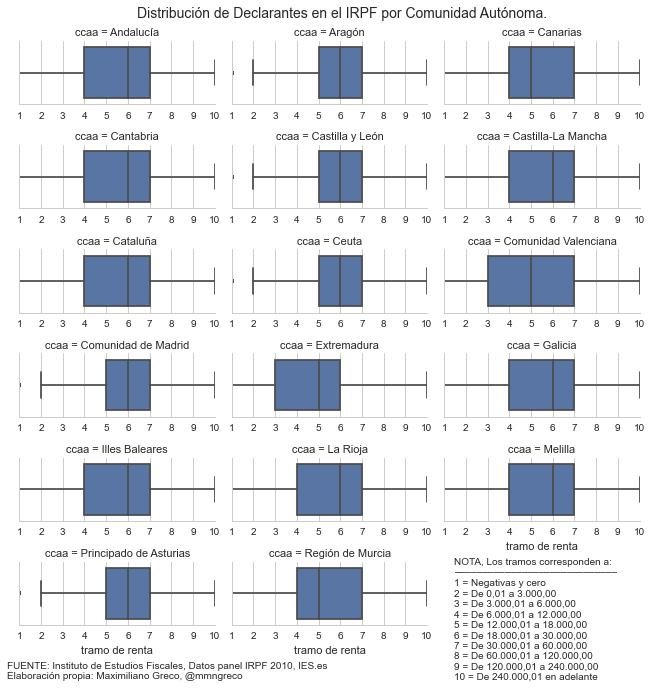

In [30]:
fg = sns.factorplot('tramo',
                    col='ccaa',
                    size=1.5,
                    col_wrap=3,
                    data=tabla_frecuencia,
                    aspect=2,
                    kind='box',
                    sharex=False, order=range(1,11))

fig = plt.gcf()
fig.text(0.2, 1, "%s" % ttl, fontsize=14, transform=(1,1))
fig.text(0, -0.02, "%s" % foot, fontsize=10, transform=(1,1))
fig.text(.69,-.02, nota, fontsize=10)

fg.set_axis_labels("tramo de renta", "")

plt.savefig('imgs/box_dist_tramo_by_ccaa.png', bbox_inches='tight', dpi=150)

In [31]:
tabla_frecuencia.head()

,tramo,ccaa
0,8,Comunidad de Madrid
1,9,Andalucía
2,5,Región de Murcia
3,6,Castilla y León
4,5,Comunidad de Madrid


In [32]:
rentas_altas = data_pob[['tramo', 'ccaa']][data_pob.tramo > 8] # rentas altas: mayor de 60 mil euros

ccaa
Melilla                    0.178852
Ceuta                      0.216505
Cantabria                  0.960151
La Rioja                   1.220584
Extremadura                1.346094
Principado de Asturias     1.788516
Región de Murcia           1.879511
Canarias                   2.124255
Castilla-La Mancha         2.792595
Galicia                    3.517414
Aragón                     3.702542
Illes Baleares             4.358331
Castilla y León            5.491057
Comunidad Valenciana       6.702228
Andalucía                 16.015061
Cataluña                  22.503922
Comunidad de Madrid       25.202385
Name: tramo, dtype: float64
––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––
TOTAL			 100.0


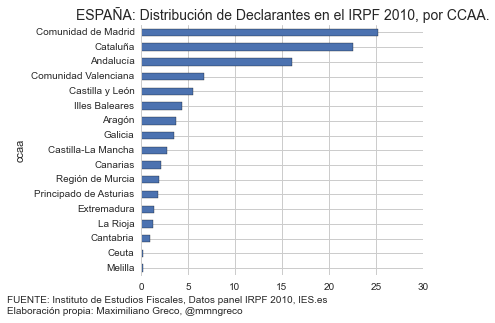

In [33]:
ttl = u'ESPAÑA: Distribución de Declarantes en el IRPF 2010, por CCAA.'

tot_count = data_pob.ccaa[data_pob.tramo > 8].count() # numero de declaraciones cuyos tramos son superiores a 7
frec_rel = lambda x: x * 100 / tot_count  # función: frecuencia relativa en %

rentas_altas.groupby('ccaa').count('tramo').tramo.apply(frec_rel).order(ascending=True).plot(kind='barh')
plt.tight_layout()

# GUARDAR IMAGEN Y TEXTO

# footnote
plt.gcf().text(0, -0.04, "%s" % foot, fontsize=10, transform=(1,1))

# Quitar las líneas del marco del eje.
ax = plt.gca()  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

# Asegurarse de dejar sólo las marcas de la izquierda y abajo.
# Las marcas de la derecha y la parte superior del gráfico son generalmente basura innecesaria de la tabla.
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_title(ttl, fontsize=14)

plt.savefig('imgs/dist_ascending_tramo_by_ccaa.png', bbox_inches='tight', dpi=150)

nota = ''''''
print(rentas_altas.groupby('ccaa').count('tramo').tramo.apply(frec_rel).order(ascending=True))
print('–' * 80)
print('TOTAL\t\t\t', rentas_altas.groupby('ccaa').count('tramo').tramo.apply(frec_rel).order(ascending=True).sum())

In [34]:
# sns.pairplot(data_pob[['ccaa', 'tramo', 'c455', 'c465', 'c620', 'c630', 'c679', 'c698', 'c699']])

In [35]:
# CREAR DATAFRAME CON FRECUENCIAS ESTADISTICAS:

tramos = range(7,11) # tramos del 7 al 10

for t in range(1, 3):
    d = data_pob.ccaa[data_pob.tramo == t]
    frec_ccaa = {}

    for c in list(d.unique()): # traducir cada ccaa por su nombre
        frec_ccaa[c] = d[d == c].count() # frecuencia absoluta de cada ccaa

    frec_ccaa = DataFrame(frec_ccaa, index=['N']) # crear el dataframe con los datos absolutos

    frec_ccaa = frec_ccaa.T # trasponer el dataframe para que los indices sean ccaa
    frec_ccaa['f'] = frec_ccaa.N * 100 / frec_ccaa.N.sum() # creamos frencuencia relativa
    frec_ccaa['F'] = np.cumsum(frec_ccaa.f) # creamos la frecuencia acumulada



In [36]:
frec_ccaa

,N,f,F
Andalucía,4018,14.358205,14.358205
Aragón,612,2.186964,16.545169
Canarias,1344,4.802744,21.347913
Cantabria,615,2.197684,23.545597
Castilla y León,1413,5.049314,28.594911
Castilla-La Mancha,1065,3.805746,32.400658
Cataluña,4321,15.440966,47.841624
Ceuta,33,0.117925,47.959548
Comunidad Valenciana,4576,16.352201,64.311750
Comunidad de Madrid,4470,15.973413,80.285163


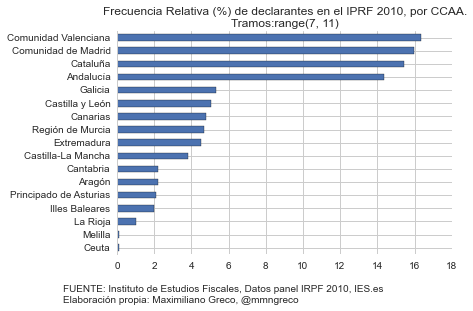

In [37]:
ttl = u'Frecuencia Relativa (%) de declarantes en el IPRF 2010, por CCAA.\nTramos:' + str(tramos)
# plot
frec_ccaa.f.order(ascending=True).plot(kind='barh')

# aspecto
ax=plt.gca()
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

# Las marcas de la derecha y la parte superior
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# titulo
plt.title(ttl)

# footnote
plt.gcf().text(0, -0.04, "%s" % foot, fontsize=10, transform=(1,1))

# guadar imagen
plt.savefig('imgs/frec_relativa_dist_por_ccaa.png', bbox_inches='tight', dpi=150)

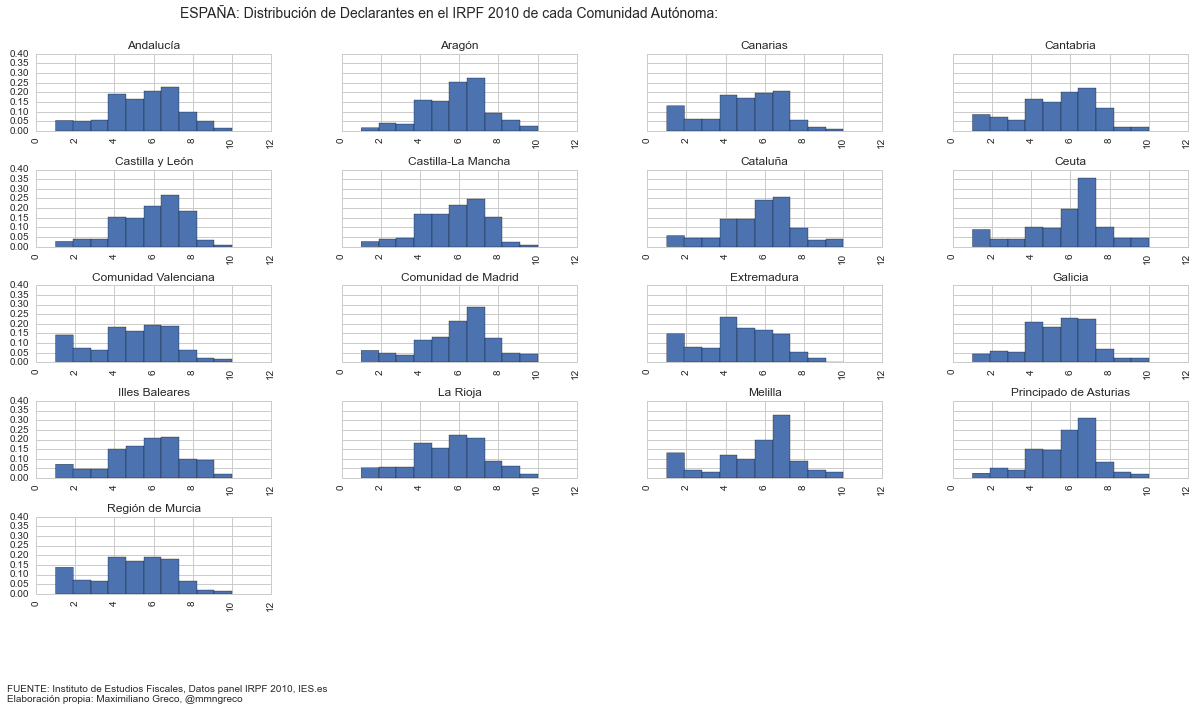

In [38]:
ttl = u'ESPAÑA: Distribución de Declarantes en el IRPF 2010 de cada Comunidad Autónoma:'

hist = tabla_frecuencia.hist(by='ccaa', 
                         column='tramo', 
                         sharey=True, 
                         figsize=(20,10), 
                         normed=True)
fig = plt.gcf()

#TITLE
fig.text(0.2, 
         0.95, 
         "%s" % ttl, 
         fontsize=14, 
         transform=(1,1))
#FOOTNOTE
fig.text(0.08, 
         0.0, 
         "%s" % foot, 
         fontsize=10, 
         transform=(1,1))
#NOTE
fig.text(.77, 
         .08, 
         nota, 
         fontsize=11)

plt.savefig('imgs/hists_frec_relativa_dist_tramo_by_ccaa.png', bbox_inches='tight', dpi=150)

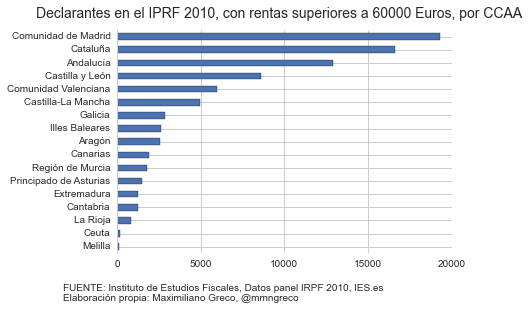

In [39]:
ttl = u'Declarantes en el IPRF 2010, con rentas superiores a 60000 Euros, por CCAA'
ccaa = data_pob.ccaa.unique()
d = dict()
for ca in ccaa:
    d[ca] = tabla_frecuencia[(tabla_frecuencia.tramo > 7) & (tabla_frecuencia.ccaa == ca)].ccaa.count()

d = DataFrame(d, index=['Declarantes']).T
d.Declarantes.order(ascending=True).plot(kind='barh')
plt.suptitle(ttl, fontsize=14)

# GUARDAR IMAGEN Y TEXTO
#plt.gcf().text(0.2, 1, "%s" % ttl, fontsize=14, transform=(100,100))

# footnote
plt.gcf().text(0, -.04, "%s" % foot, fontsize=10, transform=(100,100))

# Quitar las líneas del marco del eje.
ax = plt.gca()
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  

# Asegurarse de dejar sólo las marcas de la izquierda y abajo.
# Las marcas de la derecha y la parte superior del gráfico son generalmente basura innecesaria de la tabla.
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()



plt.savefig('imgs/seaborn_hist_dist_tramo_by_ccaa.png', bbox_inches='tight', dpi=150)

In [40]:
d.head()

,Declarantes
Andalucía,12917
Aragón,2569
Canarias,1924
Cantabria,1284
Castilla y León,8576


# EN QUÉ CCAA SE OBTIENE MÁS RENTA DEL CONTRIBUYENTE

Cuota Líquida total, nos dice lo que los declarantes pagan por los bienes y servicios que provee el Estado. Por tanto, nuestra variable será c720 + c721 = CUOTA LIQUIDA TOTAL, que tendremos que crear.

El estado y CA = Espsaña:
- Donde se obtiene mas renta del contribuyente
- Donde se trata mejor o peor al contribuyente


# QUE CCAA INGRESA MAS



# QUE CCAA ESTAN LAS RENTAS MAS ALTAS

Numero de contribuyentes en tramos altos
Numero de contribuyentes en el percentil alto

# GASTO PUBLICO (BYS) VS INGRESOS (CL)


In [41]:
data_pob['cltotal'] = data_pob.c720 + data_pob.c721
data_pob.cltotal.head() # ver la serie creada.

0    124856.914215
1     85722.795195
2     72434.661897
3     14710.037289
4      8938.034099
Name: cltotal, dtype: float64

([<matplotlib.axis.XTick at 0x1491e4e48>,
 <a list of 17 Text xticklabel objects>)

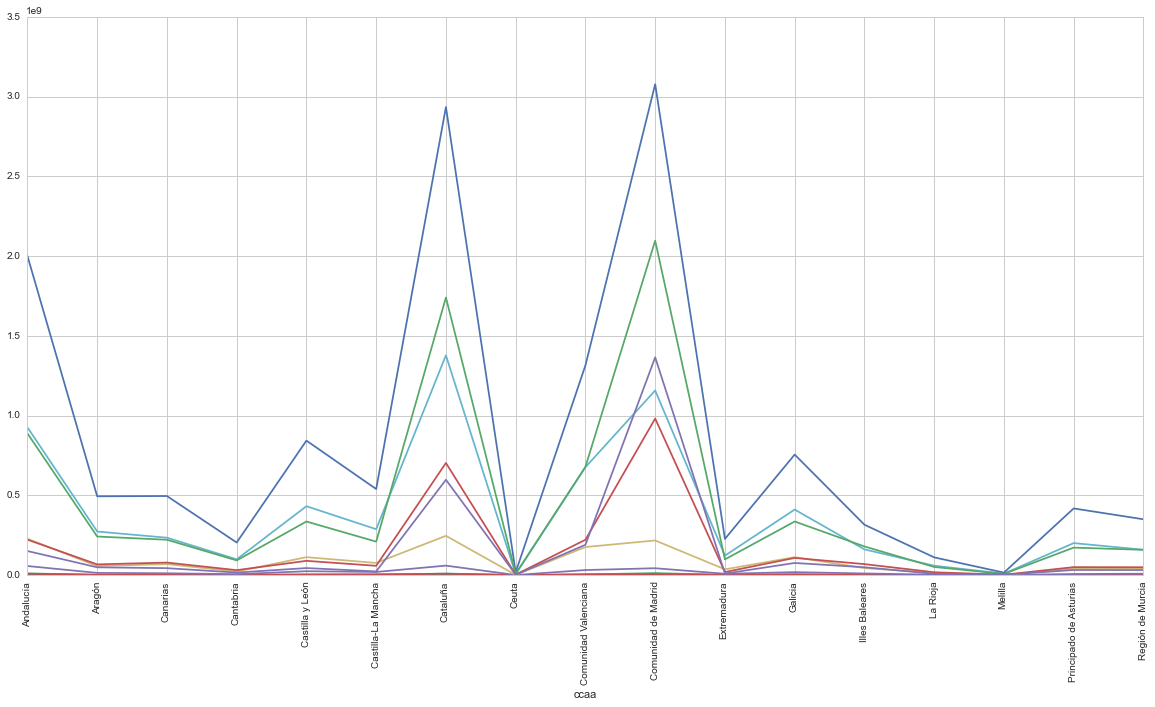

In [90]:
data_cuotas_liq = data_pob.pivot_table(values=['c720', 'c721'], index='tramo', columns='ccaa', aggfunc='sum')
#data_cuotas_liq['diff'] = data_cuotas_liq.c720 - data_cuotas_liq.c721
data_cuotas_liq

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
for i in range(1, 11):
    data_cuotas_liq.c720.loc[i].plot(ax=ax)
    # data_cuotas_liq.c721.loc[i].plot(ax=ax)

plt.xticks(range(len(data_cuotas_liq.c720.columns)), data_cuotas_liq.c720.columns, rotation=90)

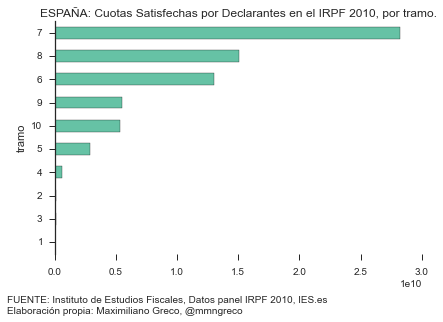

In [33]:
#tot_count = data_pob.ccaa[data_pob.tramo > 7].count()

data_pob.groupby(['tramo']).cltotal.sum().order(ascending=True).plot(kind='barh')
plt.tight_layout()

# GUARDAR IMAGEN Y TEXTO
ttl = u'ESPAÑA: Cuotas Satisfechas por Declarantes en el IRPF 2010, por tramo.'
#plt.gcf().text(0.2, 1, "%s" % ttl, fontsize=14, transform=(1,1))
plt.gcf().text(0, -0.05, "%s" % foot, fontsize=10, transform=(1,1))


# Quitar las líneas del marco del eje.
ax = plt.gca()  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  


# Las marcas de la derecha y la parte superior del gráfico
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_title(ttl)
ax.set_xlabel('')

plt.savefig('imgs/sum_ascending_cuota_by_tramo.png', bbox_inches='tight', dpi=150)


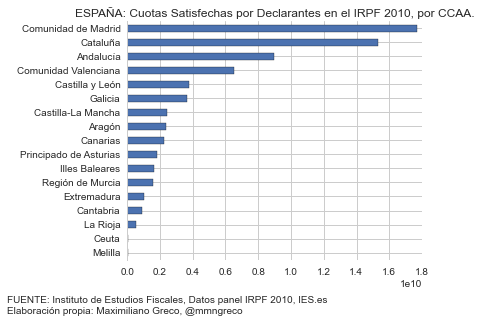

In [91]:
ccaa = data_pob.ccaa.unique()
ccaa_cltotal = dict()
for ca in ccaa:
    ccaa_cltotal[ca] = data_pob.cltotal[data_pob.ccaa == ca].sum()

ccaa_cltotal = DataFrame(ccaa_cltotal, index=['cltotal']).T

ccaa_cltotal.cltotal.order(ascending=True).plot(kind='barh')


plt.tight_layout()

# GUARDAR IMAGEN Y TEXTO
ttl = u'ESPAÑA: Cuotas Satisfechas por Declarantes en el IRPF 2010, por CCAA.'
#plt.gcf().text(0.2, 1, "%s" % ttl, fontsize=14, transform=(1,1))
plt.gcf().text(0, -0.05, "%s" % foot, fontsize=10, transform=(1,1))


# Quitar las líneas del marco del eje.
ax = plt.gca()  
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  


# Las marcas de la derecha y la parte superior del gráfico
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_title(ttl)
ax.set_xlabel('')

plt.savefig('imgs/sum_ascending_cuota_by_ccaa3.png', bbox_inches='tight', dpi=150)


# ¿Cuanto va para el estado y cuando para la CA?

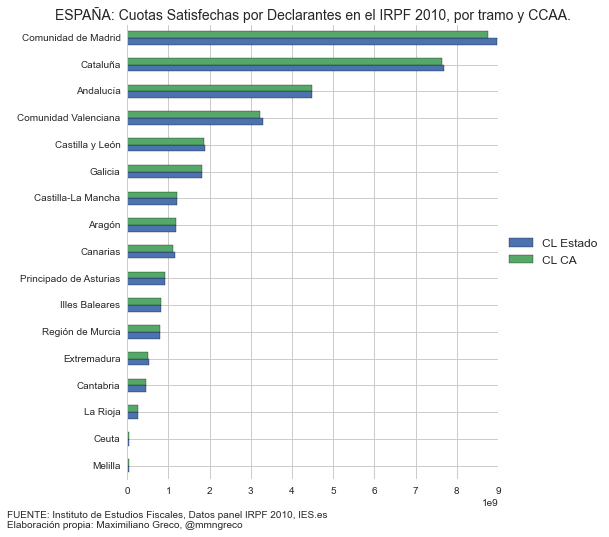

In [92]:
ccaa_cl = dict()
for ca in ccaa:
    ccaa_cl[ca] = [data_pob.c720[data_pob.ccaa == ca].sum(),
                   data_pob.c721[data_pob.ccaa == ca].sum()]

ccaa_cl = DataFrame(ccaa_cl, index=['cl_estado', 'cl_ca']).T
ccaa_cl.sort('cl_estado', inplace=True, ascending=True)
ccaa_cl.plot(kind='barh', figsize=(7,7))
ax = plt.gca()
plt.tight_layout()

# GUARDAR IMAGEN Y TEXTO
ttl = u'ESPAÑA: Cuotas Satisfechas por Declarantes en el IRPF 2010, por tramo y CCAA.'
plt.gcf().text(0, -0.02, "%s" % foot, fontsize=10, transform=(1,1))
ax.set_title(ttl, fontsize=14)

# Quitar las líneas del marco del eje.
ax.spines["top"].set_visible(False)  
ax.spines["bottom"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.spines["left"].set_visible(True)  


# Las marcas de la derecha y la parte superior del gráfico
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_xlabel('')

plt.legend(['CL Estado', 'CL CA'], fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('imgs/sum_ascending_cuota_liquida_estado_ca_by_ccaa.png', bbox_inches='tight', dpi=150)

# ANÁLISIS DE PROGRESIVIDAD

## PROGRESIVIDAD LOCAL:

INDICES: 
- LP
- ARP

VARIABLES: 
- BASE IMPONIBLE
- CUOTA LÍQUIDA
- TIPO MARGINAL
- TIPO MEDIO

In [83]:
INFO

,variables,descripcion
0,c17,RENDIMIENTOS DEL TRABAJO: REDUCCIÓN CON CARÁ...
1,c455,BASE IMPONIBLE GENERAL (450 ­ 451 + 452 ­ 453 ...
2,c620,BASE LIQUIDABLE GENERAL SOMETIDA A GRAVAMEN. (...
3,c679,MÍNIMO PERSONAL Y FAMILIAR (675 + 676 + 677 +...
4,c689,APLICACIÓN DE LAS ESCALAS DEL IMPUESTO AL IMPO...
5,c690,APLICACIÓN DE LAS ESCALAS DEL IMPUESTO AL IMPO...
6,c698,CUOTAS INTEGRAS (693 + 696) (Parte Estatal)
7,c699,CUOTAS INTEGRAS (694 + 697) (Parte Autonómica)
8,c720,CUOTA LIQUIDA ESTATAL ( 698 - 700 - 702 - 704 ...
9,c721,CUOTA LIQUIDA AUTONOMICA ( 699 - 701 - 703 - 7...


# Necesitamos los tipo de gravamen de cada ccaa para poder distinguir el tipo marginal. 

In [23]:
ls = !ls

In [24]:
escalas = list()

for l in ls:
    if not l.startswith(str('escala_')): continue
    escalas.append(l)

print(escalas) # comprobamos que se importaron los nombres de las tablas correctas

['escala_Andalucia', 'escala_Araba', 'escala_Aragon', 'escala_BL_ccaa', 'escala_BL_estatal', 'escala_Bizkaia', 'escala_Canarias', 'escala_Cantabria', 'escala_Castilla La Mancha', 'escala_Castilla y Leon', 'escala_Catalunya', 'escala_Comunidad Valenciana', 'escala_Comunidad de Madrid', 'escala_Extremadura', 'escala_Galicia', 'escala_Gipuzkoa', 'escala_Islas Baleares', 'escala_La Rioja', 'escala_Navarra', 'escala_Principado de Asturias', 'escala_Region de Murcia']


In [25]:
# cambiamos el nombre de las columnas de las tablas

trans_escalas_columns = {'Base liquidable [Hasta euros]': 'BL',
                         'Cuota Integra [euros]': 'CI',
                         'Resto base liquidable [Hasta euros]': 'resto',
                         'Tipo aplicable [Porcentaje]': 'tg'}

In [26]:
# importamos las tablas

for e in escalas:
    globals()[e] = pd.read_csv('data/%s' % e, index_col=0)
    globals()[e].rename(columns=trans_escalas_columns, inplace=True)

In [27]:
escala_Aragon # comprobamos

,BL,CI,resto,tg
0,0.0,0.00,17707.2,12.0
1,17707.2,2124.86,15300.0,14.0
2,33007.2,4266.86,20400.0,18.5
3,53407.2,8040.86,En adelante,21.5


# REFORMA IRPF:
TIPOS Y ESCALAS:
- 2015
- 2016

> http://www.agenciatributaria.es/AEAT.internet/Inicio_es_ES/La_Agencia_Tributaria/Campanas/_Campanas_/Impuesto_sobre_la_Renta_de_las_Personas_Fisicas__IRPF_/_INFORMACION/Reforma_Renta_2015/Tipos_y_escalas_de_gravamen/Tipos_y_escalas_de_gravamen.shtml

## Escala aplicable en 2016:

> http://www.agenciatributaria.es/AEAT.internet/Inicio_es_ES/La_Agencia_Tributaria/Campanas/_Campanas_/Impuesto_sobre_la_Renta_de_las_Personas_Fisicas__IRPF_/_INFORMACION/Reforma_Renta_2015/Tipos_y_escalas_de_gravamen/Escala_general_a_aplicar_a_partir_del_ejercicio_2016.shtml

## Escalas 2015 de CCAA:

> http://www.sbal.net/utilidades/tipo-de-gravamen-en-el-irpf/

In [28]:
def trans_decimal(x):
    try:
        return float(x.replace('.', '').replace(',', '.')) 
    except:
        return x


In [31]:
# importamos la escala general de 2016:
url = 'http://www.agenciatributaria.es/AEAT.internet/Inicio_es_ES/La_Agencia_Tributaria/Campanas/_Campanas_/Impuesto_sobre_la_Renta_de_las_Personas_Fisicas__IRPF_/_INFORMACION/Reforma_Renta_2015/Tipos_y_escalas_de_gravamen/Escala_general_a_aplicar_a_partir_del_ejercicio_2016.shtml'

escala2016 = pd.read_html(url, 
                        skiprows=0, 
                        index_col=None, 
                        thousands=None, 
                        header=[0,1])[0].applymap(trans_decimal)
escala2016

,Base liquidable,Cuota íntegra,Resto base liquidable,Tipo aplicable
,Hasta euros,Euros,Hasta euros,Porcentaje
0,0,0.00,12450,9.5
1,12450,1182.75,7750,12.0
2,20200,2112.75,15000,15.0
3,35200,4362.75,24800,18.5
4,60000,8950.75,En adelante,22.5


In [70]:
#dprog.sort('tipomedio', inplace=True, ascending=True) 
#dprog.plot(x='tramo', by='ccaa', y=['tipomedio','BI'], subplots=True, figsize=(10,10), kind='bar')

In [71]:
!subl3 .